# 20s / full-stitched comparison

This notebook is for comparing the derived PSD between the 20-second eyes-closed resting state recordings and for stitching all clean-closed segments in the full recording. Essentially, for the full recording, we do:

1. Identify all clean closed segments in the full recording.
2. Extract each segment. For each segment, multiply with a Hamming window of equivalent length.
3. Concatenate all Hamming-window'd segments together.
4. Run a 50% overlap windowlength=1024 Welch's method PSD on the resulting recording, for every channel. 

In [1]:
%matplotlib inline
import os
import glob
import seaborn
import numpy as np
import scipy as sp
import pandas as pd
import scipy.io
import scipy.signal
import matplotlib.pyplot as plt
from scipy.stats import linregress

In [2]:
data = sp.io.loadmat('../data/pipeline-full/oaExclFiltCARClust-mat/120127163.mat')
events = []
for event in np.squeeze(data['evts']):
     events.append([event[0][0], event[1][0][0], event[2][0][0]])
srate = data['srate'][0][0]
data  = np.squeeze(data['data'])

First, we construct a list -- where closed segments start, and what their length is.

In [3]:
c_segs = []
for i in range(len(events)):
    if events[i][0] == 'C1':
        c_segs.append([events[i][1], events[i+1][1] - events[i][1]])
        
total_length = 0
for seg in c_segs:
    total_length += seg[1]
    print(seg)
print(total_length/512)

[61346, 2181]
[63886, 4336]
[71011, 2514]
[74211, 1868]
[89880, 2037]
[92767, 2566]
[97828, 2743]
[102830, 1737]
[140797, 1770]
[143142, 3559]
[149568, 2990]
[153382, 2011]
[208861, 2880]
[218011, 1861]
68.462890625


Okay. Now let's take every segment, add them to a matrix, and join them together using Hamming windows.

In [4]:
sigs = []
for seg in c_segs:
    w = sp.signal.hamming(seg[1])
    sigs.append(data[:, seg[0]:seg[0]+seg[1]] * w)
signal = np.concatenate(sigs, axis=1)

In [ ]:
sigs2 = []
for seg in c_segs:
    if seg[1] >= 1024:
        extracted_sigs.append([data[:, seg[0]:seg[0]+seg[1]]] * w)
        

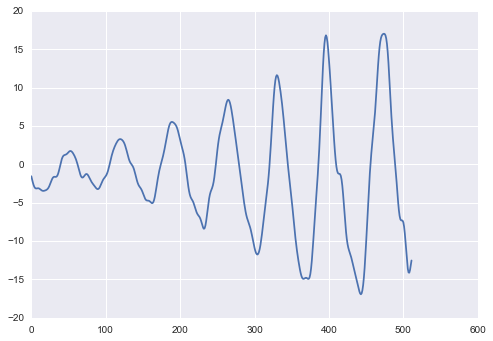

In [12]:
# plt.plot(signal[0][0:512*3])
plt.plot(signal[0][0:512])

In [6]:
f, psd = sp.signal.welch(signal[-1], srate, nperseg=srate*2, noverlap=srate, window='hamming')

(0, 25)

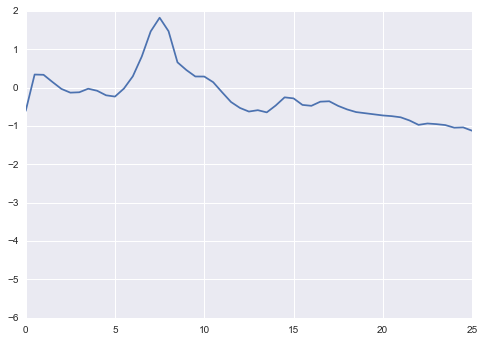

In [7]:
plt.plot(f, np.log10(psd)); plt.xlim([0, 25])

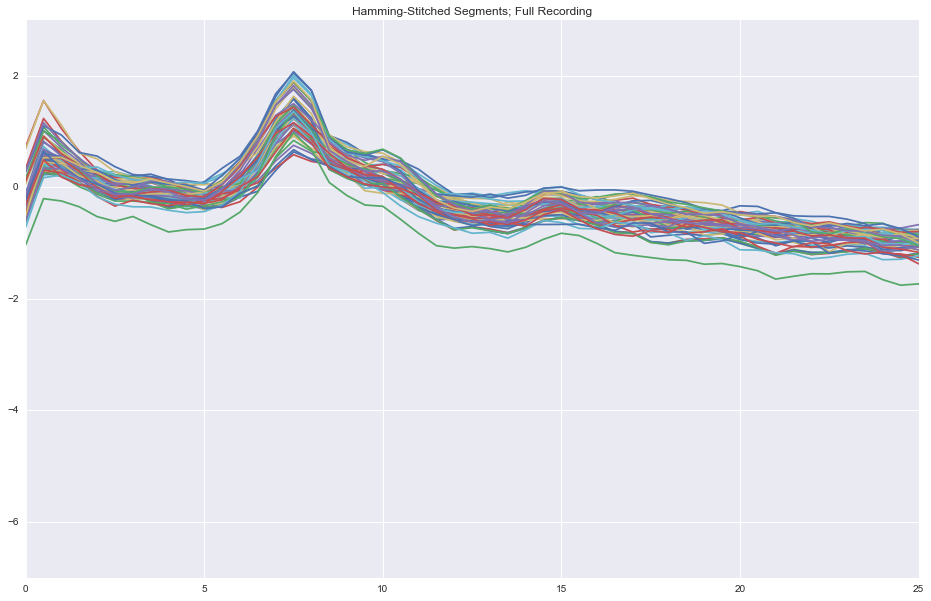

In [8]:
plt.figure(figsize=(16,10))
for i in range(len(signal)):
    f, psd = sp.signal.welch(signal[i], srate, nperseg=srate*2, noverlap=srate, window='hamming')
    plt.plot(f, np.log10(psd)); plt.xlim([0, 25]); plt.title('Hamming-Stitched Segments; Full Recording')

Okay. Let's import the 20-second resting-state eyes-closed recording for subject 163, which is who we're looking at above, and compare:

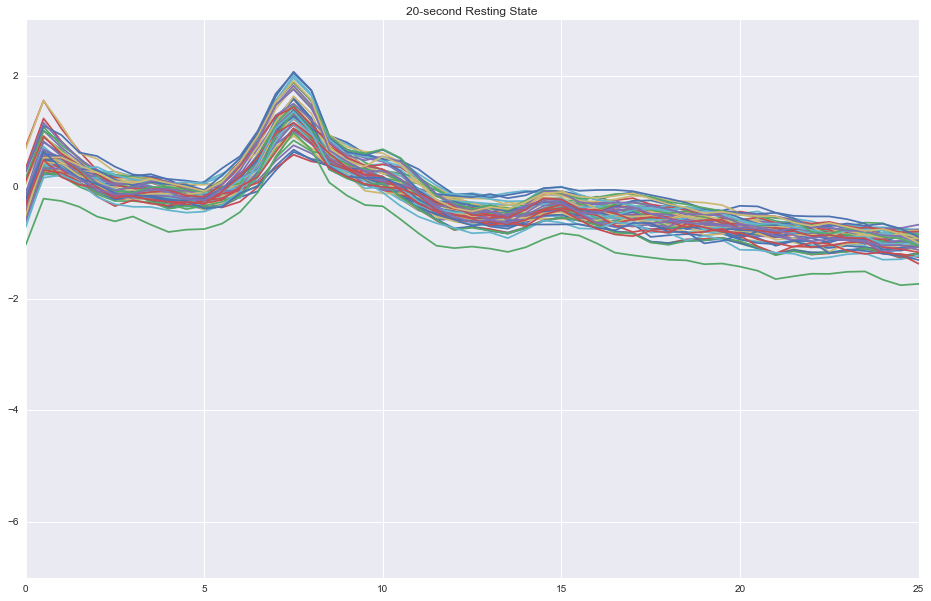

In [9]:
data = sp.io.loadmat('../data/pipeline-20s-eyesc/oaExclFiltCARClust-mat/120127163.mat')
data = data
plt.figure(figsize=(16,10))
for i in range(len(signal)):
    f, psd = sp.signal.welch(signal[i], srate, nperseg=srate*2, noverlap=srate, window='hamming')
    plt.plot(f, np.log10(psd)); plt.xlim([0, 25]); plt.title('20-second Resting State')